*Η εργασία διεκπεραιώθηκε από :                                             
Τατάς Μιχάλης (sdi1700161) ΑΜ: 1115201700161                               
Φλώρος Γιώργος(sdi1700178) ΑΜ: 1115201700178*

In [ ]:
# import all needed libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import zipfile
import sys
import random
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from google.colab import drive
from sklearn.metrics import accuracy_score

!pip install nltk==3.4

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file = zipfile.ZipFile("/content/drive/My Drive/News _dataset.zip", "r")
zip_file.extractall("/content/drive/My Drive/")

LocationTrue = r'/content/drive/My Drive/True.csv'
LocationFake = r'/content/drive/My Drive/Fake.csv'


true_ds = pd.read_csv(LocationTrue)
fake_ds = pd.read_csv(LocationFake)


SetPunct = string.punctuation + "“" + "”" + "‘" + "’"

#########################################
##        some preprocessing           ##
#########################################

true_ds['title'] = true_ds['title'].str.lower()
true_ds['text'] = true_ds['text'].str.lower()

true_ds['title'] = true_ds['title'].str.replace("\'s",'')
true_ds['title'] = true_ds['title'].str.replace("\’s",'')
true_ds['title'] = true_ds['title'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))

true_ds['text'] = true_ds['text'].str.replace("\'s",'')
true_ds['text'] = true_ds['text'].str.replace("\’s",'')
true_ds['text'] = true_ds['text'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))

fake_ds['title'] = fake_ds['title'].str.lower()
fake_ds['text'] = fake_ds['text'].str.lower()

fake_ds['title'] = fake_ds['title'].str.replace("\'s",'')
fake_ds['title'] = fake_ds['title'].str.replace("\’s",'')
fake_ds['title'] = fake_ds['title'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))

fake_ds['text'] = fake_ds['text'].str.replace("\'s",'')
fake_ds['text'] = fake_ds['text'].str.replace("\’s",'')
fake_ds['text'] = fake_ds['text'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))


**ΕΡΩΤΗΜΑ 2.α** :

Στο ερώτημα αυτό βρίσκουμε τις λέξεις που αναφέρονται πιο συχνά στους τίτλους τόσο των real news άρθρων όσο και των fake news άρθρων χωρίς stopwords, καθώς αυτές οι λέξεις αποτελούν τα πιο δημοφιλή θέματα και τα εκτυπώνουμε σε μορφή ενός wordcloud

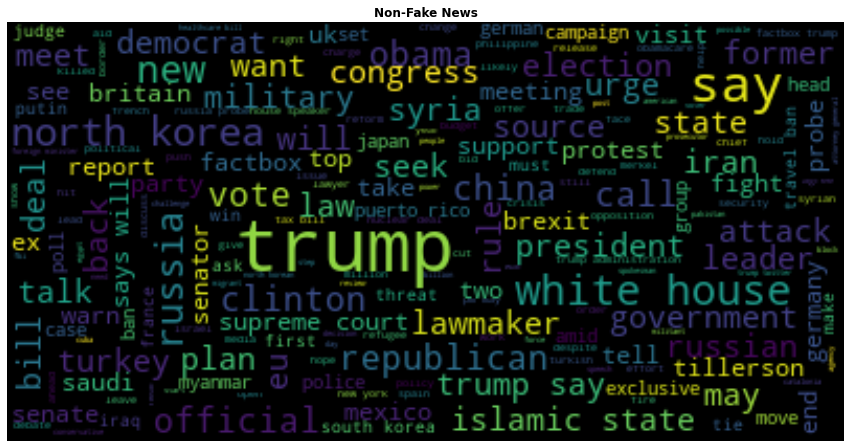

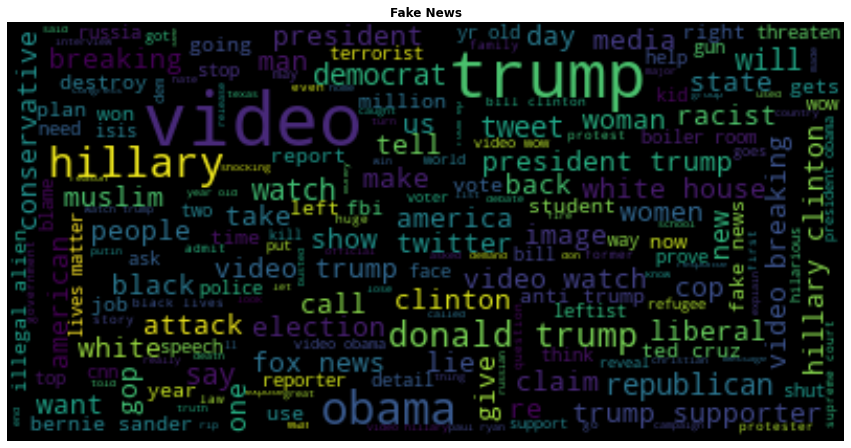

In [ ]:
# Exploring data

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

# Visualizitation of titles from non-fake news  -  2.a
# true_titles = true_ds['title'].str.replace(', ',',').str.split(' ')
true_titles = true_ds['title']

txt = ""
for value in true_titles:

  value = str(value)
  tkns = value.split()

  for i in range(len(tkns)):
    tkns[i] = tkns[i].lower()
  
  txt += " ".join(tkns) + " "

wcloud = WordCloud(max_font_size = 35, max_words=200, background_color="black", stopwords=STOPWORDS).generate(txt)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Non-Fake News", fontweight="bold")
plt.show()


# Visualizitation of titles from fake news  -  2.a
fake_titles = fake_ds['title']

txt = ""
for value in fake_titles:

  value = str(value)
  tkns = value.split()

  for i in range(len(tkns)):
    tkns[i] = tkns[i].lower()
  
  txt += " ".join(tkns) + " "

wcloud = WordCloud(max_font_size = 35, max_words=200, background_color="black", stopwords=STOPWORDS).generate(txt)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fake News", fontweight="bold")
plt.show()


**ΕΡΩΤΗΜΑ 2.β** :

Στο επόμενο κελί βρίσκεται μόνο το μισό ερώτημα 2.b για λόγους αναγνωσιμότητας στο οποίο βρίσκουμε και εκτυπώνουμε τον μέσο όρο των χαρακτήρων των τίτλων των fake και των real news τόσο με την ύπαρξη stopwords όσο και χωρίς αυτά

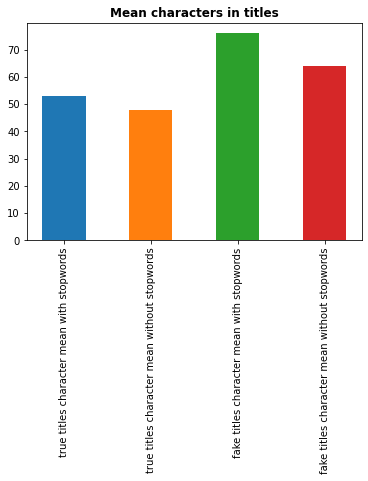

In [ ]:
# mean value of characters in true news title -  2.b

true_title_characters = true_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

for value in true_title_characters:
  for word in value.split():
    count_with_stopwords += len(word)
    if word not in STOPWORDS:
      count_without_stopwords += len(word)

true_title_characters_mean_without_stopwords = count_without_stopwords // true_title_characters.size
true_title_characters_mean_with_stopwords = count_with_stopwords // true_title_characters.size

# mean value of characters in fake news title -  2.b
fake_title_characters = fake_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

for value in fake_title_characters:
  for word in value.split():
    count_with_stopwords += len(word)
    if word not in STOPWORDS:
      count_without_stopwords += len(word)

fake_title_characters_mean_without_stopwords = count_without_stopwords // fake_title_characters.size
fake_title_characters_mean_with_stopwords = count_with_stopwords // fake_title_characters.size


# plot
plt.bar("true titles character mean with stopwords", true_title_characters_mean_with_stopwords, width=0.5)
plt.bar("true titles character mean without stopwords", true_title_characters_mean_without_stopwords, width=0.5)

plt.bar("fake titles character mean with stopwords", fake_title_characters_mean_with_stopwords, width=0.5)
plt.bar("fake titles character mean without stopwords", fake_title_characters_mean_without_stopwords, width=0.5)
plt.xticks(rotation=90)
plt.title("Mean characters in titles", fontweight="bold")
plt.show()


**ΕΡΩΤΗΜΑ 2.β (ΣΥΝΕΧΕΙΑ)** :

Στο επόμενο κελί εκτυπώνουμε τον μέσο όρο των χαρακτήρων των κειμένων των fake και των real news τόσο με την ύπαρξη stopwords όσο και χωρίς αυτά

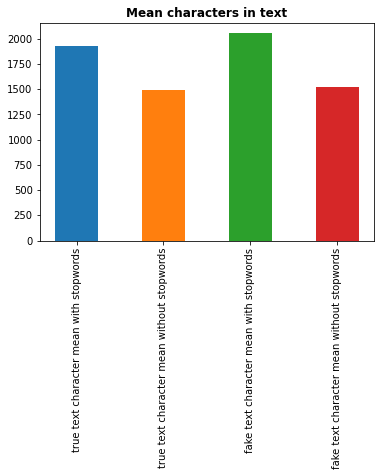

In [ ]:
# mean value of characters in true news text -  2.b

true_text_characters = true_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

for value in true_text_characters:
  for word in value.split():
    count_with_stopwords += len(word)
    if word not in STOPWORDS:
      count_without_stopwords += len(word)

true_text_characters_mean_without_stopwords = count_without_stopwords // true_text_characters.size
true_text_characters_mean_with_stopwords = count_with_stopwords // true_text_characters.size

# mean value of characters in fake news text -  2.b
fake_text_characters = fake_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

for value in fake_text_characters:
  for word in value.split():
    count_with_stopwords += len(word)
    if word not in STOPWORDS:
      count_without_stopwords += len(word)

fake_text_characters_mean_without_stopwords = count_without_stopwords // fake_text_characters.size
fake_text_characters_mean_with_stopwords = count_with_stopwords // fake_text_characters.size


# plot
plt.bar("true text character mean with stopwords", true_text_characters_mean_with_stopwords, width=0.5)
plt.bar("true text character mean without stopwords", true_text_characters_mean_without_stopwords, width=0.5)

plt.bar("fake text character mean with stopwords", fake_text_characters_mean_with_stopwords, width=0.5)
plt.bar("fake text character mean without stopwords", fake_text_characters_mean_without_stopwords, width=0.5)
plt.xticks(rotation=90)
plt.title("Mean characters in text", fontweight="bold")
plt.show()


**ΕΡΩΤΗΜΑ 2.γ && 2.δ** :

Στο επόμενο κελί βρίσκεται μόνο το μισό ερώτημα 2.c && 2.d για λόγους αναγνωσιμότητας στο οποίο βρίσκουμε και εκτυπώνουμε τον μέσο όρο των λέξεων των τίτλων των fake και των real news τόσο με την ύπαρξη stopwords όσο και χωρίς αυτά

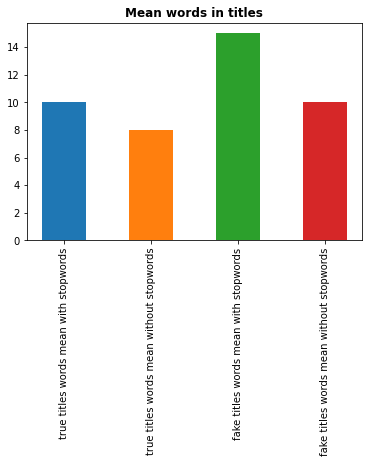

In [ ]:
# mean value of words in true news title -  2.c && 2.d

true_title_words = true_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

for value in true_title_words:
  for word in value.split():
    count_with_stopwords += 1
    if word not in STOPWORDS:
      count_without_stopwords += 1

true_title_words_mean_without_stopwords = count_without_stopwords // true_title_words.size
true_title_words_mean_with_stopwords = count_with_stopwords // true_title_words.size

# mean value of words in fake news title -  2.c && 2.d
fake_title_words = fake_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

for value in fake_title_words:
  for word in value.split():
    count_with_stopwords += 1
    if word not in STOPWORDS:
      count_without_stopwords += 1

fake_title_words_mean_without_stopwords = count_without_stopwords // fake_title_words.size
fake_title_words_mean_with_stopwords = count_with_stopwords // fake_title_words.size


# plot
plt.bar("true titles words mean with stopwords", true_title_words_mean_with_stopwords, width=0.5)
plt.bar("true titles words mean without stopwords", true_title_words_mean_without_stopwords, width=0.5)

plt.bar("fake titles words mean with stopwords", fake_title_words_mean_with_stopwords, width=0.5)
plt.bar("fake titles words mean without stopwords", fake_title_words_mean_without_stopwords, width=0.5)
plt.xticks(rotation=90)
plt.title("Mean words in titles", fontweight="bold")
plt.show()


**ΕΡΩΤΗΜΑ 2.γ && 2.δ (ΣΥΝΕΧΕΙΑ)** : 

Στο επόμενο κελί βρίσκουμε και εκτυπώνουμε τον μέσο όρο των λέξεων των κειμένων των fake και των real news τόσο με την ύπαρξη stopwords όσο και χωρίς αυτά

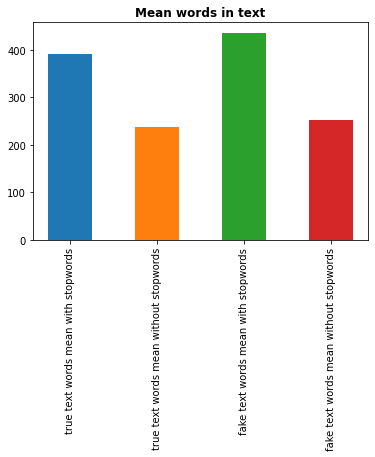

In [ ]:
# mean value of words in true news text -  2.c && 2.d
true_text_words = true_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

for value in true_text_words:
  for word in value.split():
    count_with_stopwords += 1
    if word not in STOPWORDS:
      count_without_stopwords += 1

true_text_words_mean_without_stopwords = count_without_stopwords // true_text_words.size
true_text_words_mean_with_stopwords = count_with_stopwords // true_text_words.size

# mean value of words in fake news text -  2.c && 2.d
fake_text_words = fake_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

for value in fake_text_words:
  for word in value.split():
    count_with_stopwords += 1
    if word not in STOPWORDS:
      count_without_stopwords += 1

fake_text_words_mean_without_stopwords = count_without_stopwords // fake_text_words.size
fake_text_words_mean_with_stopwords = count_with_stopwords // fake_text_words.size


# plot
plt.bar("true text words mean with stopwords", true_text_words_mean_with_stopwords, width=0.5)
plt.bar("true text words mean without stopwords", true_text_words_mean_without_stopwords, width=0.5)

plt.bar("fake text words mean with stopwords", fake_text_words_mean_with_stopwords, width=0.5)
plt.bar("fake text words mean without stopwords", fake_text_words_mean_without_stopwords, width=0.5)
plt.xticks(rotation=90)
plt.title("Mean words in text", fontweight="bold")
plt.show()

**ΕΡΩΤΗΜΑ 2.ε** :

Πιο συχνά bigrams στους τίτλους των fake και true news

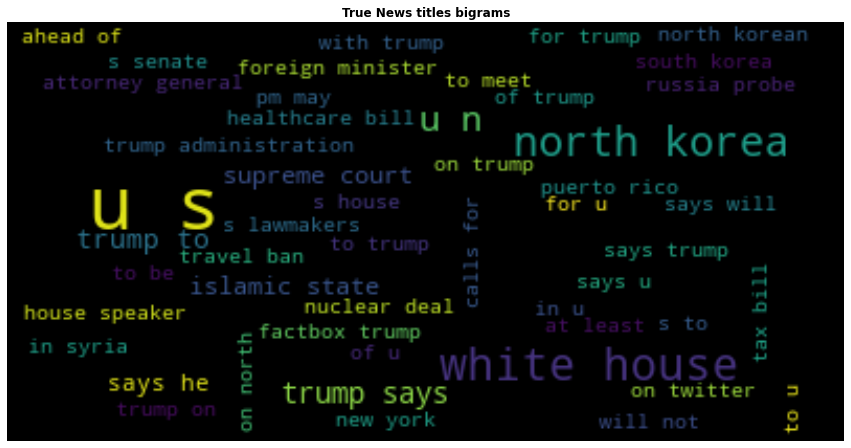

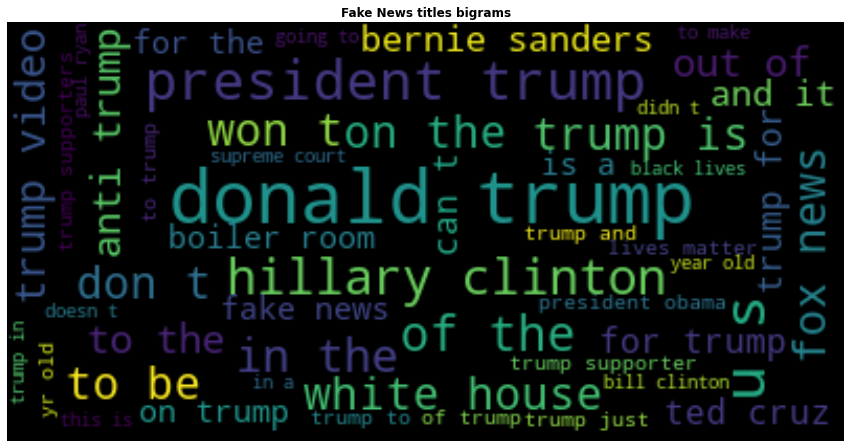

In [ ]:
from collections import Counter
from nltk.util import ngrams


# print wordcloud for most common digrams in true news titles
true_title = true_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

bigrams = []
for value in true_title:
  temp = ngrams(value.split(), 2)
  for i in temp:
    bigrams.append(i)
  
strng = []
for i in bigrams:
  strng.append(" ".join(i))


word_dict = Counter(strng)
wcloud = WordCloud(max_font_size = 35, max_words=50, background_color="black", stopwords=STOPWORDS).generate_from_frequencies(word_dict)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("True News titles bigrams", fontweight="bold")
plt.show()


# print wordcloud for most common digrams in fake news titles
fake_title = fake_ds['title']

count_without_stopwords = 0
count_with_stopwords = 0

bigrams = []
for value in fake_title:
  temp = ngrams(value.split(), 2)
  for i in temp:
    bigrams.append(i)
  
strng = []
for i in bigrams:
  strng.append(" ".join(i))


word_dict = Counter(strng)
wcloud = WordCloud(max_font_size = 35, max_words=50, background_color="black", stopwords=STOPWORDS).generate_from_frequencies(word_dict)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fake News titles bigrams", fontweight="bold")
plt.show()

**ΕΡΩΤΗΜΑ 2.ε (ΣΥΝΕΧΕΙΑ)** :

Πιο συχνά bigrams στο text των real και fake news

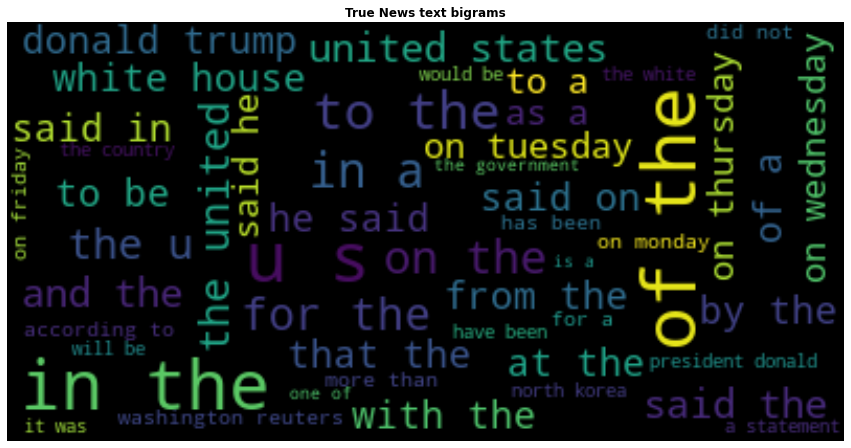

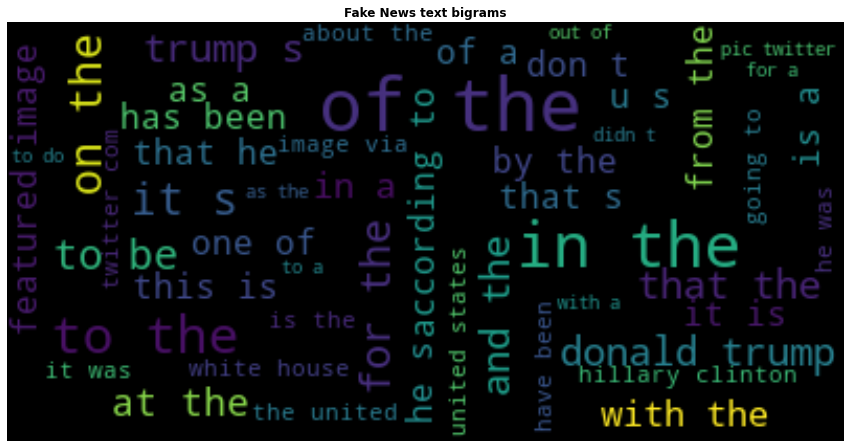

In [ ]:
from collections import Counter
from nltk.util import ngrams


# print wordcloud for most common digrams in true news titles
true_title = true_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

bigrams = []
for value in true_title:
  temp = ngrams(value.split(), 2)
  for i in temp:
    # print(i)
    bigrams.append(i)
  
strng = []
for i in bigrams:
  strng.append(" ".join(i))


# print(strng[0])
word_dict = Counter(strng)
wcloud = WordCloud(max_font_size = 35, max_words=50, background_color="black", stopwords=STOPWORDS).generate_from_frequencies(word_dict)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("True News text bigrams", fontweight="bold")
plt.show()


# print wordcloud for most common digrams in fake news titles
fake_title = fake_ds['text']

count_without_stopwords = 0
count_with_stopwords = 0

bigrams = []
for value in fake_title:
  temp = ngrams(value.split(), 2)
  for i in temp:
    bigrams.append(i)
  
strng = []
for i in bigrams:
  strng.append(" ".join(i))


word_dict = Counter(strng)
wcloud = WordCloud(max_font_size = 35, max_words=50, background_color="black", stopwords=STOPWORDS).generate_from_frequencies(word_dict)

plt.figure(figsize=(15,15))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fake News text bigrams", fontweight="bold")
plt.show()

In [ ]:
def fitTransform(Method,feature,model,dataset_train):
  if Method == "Count":
    bow_CountTrain = model.fit_transform(dataset_train[feature])
    print(bow_CountTrain.shape)
    print(model.get_feature_names())
    # print(bow_CountTrain.toarray())
    return bow_CountTrain.toarray()
  elif Method == "tf-idf":
    tfidf = model.fit_transform(dataset_train[feature])
    print(tfidf.shape)
    print(model.get_feature_names())
    # print(tfidf.toarray())
    return tfidf.toarray()

In [ ]:
def ReturnTrainedModel(modelstr,TrainVec,TrainDataset):
  if (modelstr == "Logistic"):
    LogisticRegressionModel = LogisticRegression()
    LogisticRegressionModel.fit(TrainVec,TrainDataset['label'].values)
    return LogisticRegressionModel
  elif (modelstr == "NB"):
    NB_class_model = MultinomialNB()
    NB_class_model.fit(TrainVec,TrainDataset['label'].values)
    return NB_class_model
  elif (modelstr == "RF"):
    RF_class_model = RandomForestClassifier()
    RF_class_model.fit(TrainVec, TrainDataset['label'].values)
    return RF_class_model
  elif (modelstr == "SVM"):
    SVM_class_model = SVC(C=0.5,kernel='linear',gamma=1)
    SVM_class_model.fit(TrainVec, TrainDataset['label'].values)
    return SVM_class_model
  elif (modelstr == "GNB"):
    GNB_class_model = GaussianNB()
    GNB_class_model.fit(TrainVec, TrainDataset['label'].values)
    return GNB_class_model

**3.Δημιουργία συνόλου εκμάθησης και δοκιμής**                                                                     
Για preprocessing στο dataset μετατρέπουμε τα γράμματα σε πεζά , αφαιρούμε τα σημεία στίξης και επειδή παρατηρήσαμε πως υπάρχουν πολλές καταλήξεις σε 's (π.χ Trump's) τις αντικαταστήσαμε με το κενό (Trump) με σκοπό να βελτιώσουμε την εύρεση των λέξεων στα glove vectors(πράγμα που εκ του αποτελέσματος συνέβη) αλλά και τις αποδόσεις σε Count Vectorizer και Tf-idf.
  Ως train παίρνουμε το 60% του dataset , ίσως έπρεπε να το αυξήσουμε κατά 10% ακόμα αλλά τα αποτελέσματα είναι ήδη πολύ καλά

In [ ]:
Location = '/content/drive/My Drive/True.csv'
 
true_ds = pd.read_csv(Location)
true_ds = true_ds.dropna(axis=0)

SetPunct = string.punctuation + "“" + "”" + "‘" + "’"


#########################################
true_ds['title'] = true_ds['title'].str.lower()
true_ds['text'] = true_ds['text'].str.lower()

true_ds['title'] = true_ds['title'].str.replace("\'s",'')
true_ds['title'] = true_ds['title'].str.replace("\’s",'')
true_ds['title'] = true_ds['title'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))

true_ds['text'] = true_ds['text'].str.replace("\'s",'')
true_ds['text'] = true_ds['text'].str.replace("\’s",'')
true_ds['text'] = true_ds['text'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))
t_df = true_ds
########################################
t_df = true_ds.sample(frac=1)
t_df['label'] = '1'
trainrows =(int)(0.6 * len(t_df))
print(trainrows)

TrainTrue = t_df[:trainrows]
TestTrue = t_df[trainrows:]

TrainTrue

12850


,title,text,subject,date,label
12418,russia will keep bases in syria to strike at i...,moscow reuters russia will keep a naval an...,worldnews,"December 12, 2017",1
3718,former fbi chief mueller appointed to probe tr...,washington reuters the u s justice depart...,politicsNews,"May 17, 2017",1
11255,president obama final state of the union address,reuters president barack obama knocked rep...,politicsNews,"January 13, 2016",1
16305,ahead of trump trip china urges u s not to a...,beijing taipei reuters china urged the uni...,worldnews,"October 27, 2017",1
4358,factbox trump supreme court appointee to affe...,neil gorsuch president donald trump appointee...,politicsNews,"April 7, 2017",1
...,...,...,...,...,...
12955,tillerson to visit africa in first quarter of ...,ramstein air base germany reuters u s se...,worldnews,"December 6, 2017",1
15601,saudi king receives ex lebanon pm hariri in ri...,riyadh reuters saudi king salman received ...,worldnews,"November 6, 2017",1
18750,south korea expects more provocative acts by n...,seoul reuters south korea expects more pro...,worldnews,"September 28, 2017",1
12919,extremism stems from repressive states not we...,london reuters repressive states are to bl...,worldnews,"December 7, 2017",1


In [ ]:
Location = '/content/drive/My Drive/Fake.csv'
fake_ds = pd.read_csv(Location)
fake_ds = fake_ds.dropna(axis=0)
#########################################
fake_ds['title'] = fake_ds['title'].str.lower()
fake_ds['text'] = fake_ds['text'].str.lower()
fake_ds['title'] = fake_ds['title'].str.replace("\'s",'')
fake_ds['title'] = fake_ds['title'].str.replace("\’s",'')
fake_ds['title'] = fake_ds['title'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))

fake_ds['text'] = fake_ds['text'].str.replace("\'s",'')
fake_ds['text'] = fake_ds['text'].str.replace("\’s",'')
fake_ds['text'] = fake_ds['text'].str.translate(str.maketrans(SetPunct, ' '*(len(SetPunct))))
########################################
f_df = fake_ds.sample(frac=1)
f_df['label'] = '0'
trainrows =(int)(0.6 * len(f_df))
print(trainrows)

TrainFalse = f_df[:trainrows]
TestFalse = f_df[trainrows:]

TrainFalse

14088


,title,text,subject,date,label
9828,redskins player has tantrum we re being tear...,i respect the office i respect the troops of...,politics,"Sep 25, 2017",0
1019,trump confirms he thinks gop healthcare bill ...,trump got into a bizarre pissing match with fo...,News,"June 25, 2017",0
20271,british actress nails it do you think isis ca...,pathetic predictably impotent we are not unit...,left-news,"Jul 15, 2016",0
4176,this woman and her sign show us everything yo...,donald trump while pretending to reach out to...,News,"October 15, 2016",0
2063,american spring breakers chant trump build t...,while a group of americans were vacationing in...,News,"March 21, 2017",0
...,...,...,...,...,...
5409,one of the worst right wing trolls just got b...,right wing super troll and breitbart com contr...,News,"July 20, 2016",0
13704,breaking muslim terrorist dad visited state d...,he was such a nice boy from such a nice famil...,politics,"Jun 12, 2016",0
15119,unbelievable il city denies re zoning request...,mums the word on christian persecution in the ...,politics,"Oct 5, 2015",0
20653,twisted anti american riots by illegals portr...,more protests are probably happening today at ...,left-news,"Apr 30, 2016",0


In [ ]:
train = pd.concat([TrainFalse,TrainTrue])
test = pd.concat([TestTrue,TestFalse])

In [ ]:
train.to_csv("/content/drive/My Drive/train.csv",index=False)
test.to_csv("/content/drive/My Drive/test.csv",index=False)

Επειδή παίρνουμε τυχαία τις εγγραφές τις αποθηκεύουμε μια φορά στα csv αρχεία και τις φορτώνουμε απο εκεί για τα τεστ

In [ ]:
Location = '/content/drive/My Drive/train.csv'
train = pd.read_csv(Location)
Location = '/content/drive/My Drive/test.csv'
test = pd.read_csv(Location)

train = train.sample(frac=1)
train.reset_index(drop ="true")
test = test.sample(frac=1)
test.reset_index(drop = "true")


,title,text,subject,date,label
0,key democrats mocked in saturday night live sk...,saturday night live usually hits the republica...,politics,"Nov 12, 2017",0
1,mike huckabee somebody needs to go to prison...,hey mainstream media when are you going to tak...,politics,"Mar 6, 2017",0
2,new report proves voter suppression handed tr...,in a brand new expos on mother jones investi...,News,"October 19, 2017",0
3,congress revisits obamacare this time with a ...,washington reuters the u s congress was w...,politicsNews,"September 12, 2017",1
4,obama to announce supreme court nominee,washington reuters u s president barack o...,politicsNews,"March 16, 2016",1
...,...,...,...,...,...
17955,oracle ceo catz to join trump transition team ...,san francisco reuters oracle corp chief ex...,politicsNews,"December 15, 2016",1
17956,myanmar protesters try to block aid shipment t...,sittwe myanmar reuters buddhist protester...,worldnews,"September 21, 2017",1
17957,hysterical rachel maddow claims rain kept onl...,rachel maddow is hysterical in the video below...,politics,"Jun 21, 2017",0
17958,trump administration to review dozens of u s ...,washington reuters u s president donald t...,politicsNews,"April 26, 2017",1


**2.Υλοποίηση Κατηγοριοποίησης**                                                                          
Παίρνουμε τις Count και Tf-idf αναπαραστάσεις των data μας. Ως max_df έχουμε επιλέξει να βάλουμε 0.75 έτσι ώστε να κόψουμε τις λέξεις που εμφανίζονται > 75 % των δεδομένων. Ως max features επιλέξαμε τα 11.000 για να πάρουμε όσο το δυνατόν καλύτερες αναπαραστάσεις

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Count_vectorizer = CountVectorizer(max_df = 0.75, min_df=1, max_features=11000,
stop_words='english',ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2),max_df=0.75, min_df=1, max_features=11000,stop_words='english')

CountVectors_train = fitTransform("Count","text",Count_vectorizer,train)
tf_idf_vectors_train = fitTransform("tf-idf","text",tfidf_vectorizer,train)

print("Count:\n")
print(CountVectors_train)
print("tf-idf:\n")
print(tf_idf_vectors_train)


(26938, 11000)
['00', '00 pm', '000', '000 000', '000 jobs', '000 people', '000 refugees', '000 rohingya', '000 year', '10', '10 000', '10 billion', '10 days', '10 million', '10 percent', '10 year', '10 years', '100', '100 000', '100 days', '100 million', '100 percent', '10th', '11', '11 2001', '11 million', '110', '11th', '12', '12 million', '12 percent', '12 year', '120', '125', '13', '13 2017', '13 percent', '130', '14', '14 year', '140', '15', '15 000', '15 2017', '15 percent', '15 year', '15 years', '150', '150 000', '16', '160', '17', '17 2017', '17 year', '18', '18 months', '180', '19', '1950', '1960', '1960s', '1967', '1970s', '1973', '1975', '1979', '1980', '1980s', '1981', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1b', '1st', '20', '20 000', '20 2017', '20 million', '20 percent', '20 year', '20 years', '200', '200 000', '200 million', '200 people', '2000', '2001', '2002', '

In [ ]:
#regularize if needed
# means = np.mean(CountVectors_train, axis=0)
# stds = np.std(CountVectors_train, axis=0)

# traindata = (CountVectors_train - means)/stds

# testdata = (testdata - means)/stds

In [ ]:
# transofmr test data to Count and tf_idf vectors
CountVectors_test = Count_vectorizer.transform(test['text'])
tf_idf_vectors_test = tfidf_vectorizer.transform(test['text'])
tf_idf_vec_test = tf_idf_vectors_test.toarray()
CountVec_test = CountVectors_test.toarray()

# print(tf_idf_vec_test)
# print(CountVec_test)

In [ ]:
import gensim.downloader as api


# download the pretrained embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")
#cn_vectors = api.load("conceptnet-numberbatch-17-06-300")
# pre_ft_vectors = api.load('fasttext-wiki-news-subwords-300')
#glove_vectors = api.load('glove-twitter-25')

[==================================================] 100.0% 128.1/128.1MB downloaded


Με την συνάρτηση word2vec_transform_text συγκεντρώνονται τα vectors των λέξεων - που βρίσκουμε από το glove - του text σε ένα np array και στην συνέχεια επιστρέφεται το μέσο διάνυσμα των στηλών όπως έχει ζητηθεί από την εκφώνηση. Σε περίπτωση που μια λέξη είναι out of vocabulary παραλείπεται από τον υπολογισμό, χάνεται βέβαια πληροφορία.

In [ ]:
def word2vec_transform_text(pretrained_model,text):
  splits = text.split()
  textvector = []
  for word in splits:
    if word in pretrained_model.vocab:
      textvector.append(np.array(pretrained_model[word]))
  if len(textvector) == 0:
    return
  textarr = np.array(textvector)
  return textarr.mean(axis=0)

In [ ]:
def ConvertData(DataSet,model):
  textlist = []
  for index, row in DataSet.iterrows():
    ret = word2vec_transform_text(model,row['text'])
    if ret is None:
      # print(row['text'])
      DataSet = DataSet.drop(index)
      continue
    textlist.append(ret)
  return np.array(textlist),DataSet

In [ ]:
#convert train Data to word2vec avg vector
retval = ConvertData(train,glove_vectors)
train_word2vec = retval[1]
train_input = retval[0]

In [ ]:
#convert test Data to word2vec avg vector
retval = ConvertData(test,glove_vectors)
test_word2vec = retval[1]
test_input = retval[0]

Παρακάτω παρουσιάζονται οι μελέτες όλων των μοντέλων , τα αποτελέσματα θα σχολιαστούν στο τέλος!                                                     
2.1                                                                       
2.2                                                                       
                                                                

**Logistic Regression**

In [ ]:
LogisticRegression_model_count = ReturnTrainedModel("Logistic",CountVectors_train,train)
accuracy = LogisticRegression_model_count.score(CountVec_test, test['label'].values)
print("Count Vectorizer train/test dataset, Logistic Regression model")
print("Accuracy = ", accuracy * 100, "%")
predicted = LogisticRegression_model_count.predict(CountVec_test)
print(f"Classification report for classifier {LogisticRegression_model_count}\nF1 score:\n"
      f"{metrics.f1_score(test['label'], predicted)}\n")

LogisticRegression_model_tf = ReturnTrainedModel("Logistic",tf_idf_vectors_train,train)
accuracy = LogisticRegression_model_tf.score(tf_idf_vec_test, test['label'].values)
print("Tf-idf Vectorizer train/test dataset, Logistic Regression model")
print("Accuracy = ", accuracy * 100, "%")
predicted = LogisticRegression_model_tf.predict(tf_idf_vec_test)
print(f"Classification report for classifier {LogisticRegression_model_tf}\nF1 score:\n"
      f"{metrics.f1_score(test['label'], predicted)}\n")

LogisticRegression_model_word2vec = ReturnTrainedModel("Logistic",train_input,train_word2vec)
accuracy = LogisticRegression_model_word2vec.score(test_input, test_word2vec['label'].values)
print("words2vec mean train/test dataset, Logistic Regression model")
print("Accuracy = ", accuracy * 100, "%")
predicted = LogisticRegression_model_word2vec.predict(test_input)
print(f"Classification report for classifier {LogisticRegression_model_word2vec}\nF1 score:\n"
      f"{metrics.f1_score(test_word2vec['label'].values, predicted)}\n")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Count Vectorizer train/test dataset, Logistic Regression model
Accuracy =  99.71603563474387 %
Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
F1 score:
0.9970271058000583

Tf-idf Vectorizer train/test dataset, Logistic Regression model
Accuracy =  98.93652561247215 %
Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
F1 score:
0.98888436245126

words2vec mean train/test

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Naive Bayes**

In [ ]:
NB_class_model_count = ReturnTrainedModel("NB",CountVectors_train,train)
accuracy = NB_class_model_count.score(CountVec_test, test['label'].values)
print("Count Vectorizer train/test dataset, Naive Bayes model")
print("Accuracy = ", accuracy * 100, "%")
predicted = NB_class_model_count.predict(CountVec_test)
print(f"Classification report for classifier {NB_class_model_count}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

NB_class_model_tf = ReturnTrainedModel("NB",tf_idf_vectors_train,train)
accuracy = NB_class_model_tf.score(tf_idf_vec_test, test['label'].values)
print("Tf-idf Vectorizer train/test dataset, Naive Bayes model")
print("Accuracy = ", accuracy * 100, "%")
predicted = NB_class_model_tf.predict(tf_idf_vec_test)
print(f"Classification report for classifier {NB_class_model_tf}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

NB_model_word2vec = ReturnTrainedModel("GNB",train_input,train_word2vec)
accuracy = NB_model_word2vec.score(test_input, test_word2vec['label'].values)
print("words2vec mean train/test dataset, Gaussian Naive Bayes model")
print("Accuracy = ", accuracy * 100, "%")
predicted = NB_model_word2vec.predict(test_input)
print(f"Classification report for classifier {NB_model_word2vec}\nF1 score:\n"
      f"{metrics.f1_score(test_word2vec['label'].values, predicted)}\n")

Count Vectorizer train/test dataset, Naive Bayes model
Accuracy =  96.05790645879733 %
Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1 score:
0.9589041095890412

Tf-idf Vectorizer train/test dataset, Naive Bayes model
Accuracy =  94.771714922049 %
Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1 score:
0.9452190653987516

words2vec mean train/test dataset, Gaussian Naive Bayes model
Accuracy =  88.59386475340376 %
Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09)
F1 score:
0.8850293263481579



**Random Forests**


In [ ]:
RF_class_model_count = ReturnTrainedModel("RF",CountVectors_train,train)
accuracy = RF_class_model_count.score(CountVectors_test, test['label'].values)
print("Count Vectorizer train/test dataset, Random Forest classifier model")
print("Accuracy = ", accuracy * 100, "%")
predicted = RF_class_model_count.predict(CountVec_test)
print(f"Classification report for classifier {RF_class_model_count}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

RF_class_model_tf = ReturnTrainedModel("RF",tf_idf_vectors_train,train)
accuracy = RF_class_model_tf.score(tf_idf_vec_test, test['label'].values)
print("Tf-idf vectorizer train/test dataset, Random Forest classifier model")
print("Accuracy = ", accuracy * 100, "%")
predicted = RF_class_model_tf.predict(tf_idf_vec_test)
print(f"Classification report for classifier {RF_class_model_tf}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

RF_model_word2vec = ReturnTrainedModel("RF",train_input,train_word2vec)
accuracy = RF_model_word2vec.score(test_input, test_word2vec['label'].values)
print("words2vec mean train/test dataset, Random Forest classifier model")
print("Accuracy = ", accuracy * 100, "%")
predicted = RF_model_word2vec.predict(test_input)
print(f"Classification report for classifier {RF_model_word2vec}\nF1 score:\n"
      f"{metrics.f1_score(test_word2vec['label'].values, predicted)}\n")

Count Vectorizer train/test dataset, Random Forest classifier model
Accuracy =  99.72160356347439 %
Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1 score:
0.9970869261244466

Tf-idf vectorizer train/test dataset, Random Forest classifier model
Accuracy =  99.67706013363029 %
Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto

**Grid Search for SVM params**                                                            
Τρέξαμε το Grid Search με κάποιες ενδεικτικές τιμές των Count αναπαραστάσεων σε ένα πολύ μικρό slice του dataset για να γλυτώσουμε υπολογιστικό χρόνο (με μεγαλύτερο κομμάτι του dataset ένα fit έτρεχε για 30 λεπτά) . Πήραμε τις optimal τιμές και τις χρησιμοποιήσαμε στο SVM μοντέλο. Σε γενικές γραμμές βλέπουμε πως τα δεδομένα μας έχουν πολύ γραμμικό διαχωρισμό σε σχέση με τον radial basis function kernel του SVM. Σε γενικές γραμμές είναι κάπως αναμενόμενο επειδή έχουμε πολλές διαστάσεις(11.000) στα δεδομένα μας και όσο περισσότερες οι διαστάσεις τόσο πιο εύκολο να διαχωρίσουμε τα δεδομένα μας γραμμικά.(https://stats.stackexchange.com/questions/155596/how-to-prove-that-text-is-linearly-separable)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.5, 1 , 5], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
samplegrid = train[:(int)(0.1 * len(train))]
labelsgrid = samplegrid['label']
grid.fit(CountVectors_train[:(int)(0.1 * len(CountVectors_train))], labelsgrid)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.511, total=  12.1s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.511, total=  11.6s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.7s remaining:    0.0s


[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.514, total=  11.7s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.514, total=  11.7s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.5, gamma=1, kernel=rbf, score=0.508, total=  11.7s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.950, total=   3.9s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.978, total=   4.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.983, total=   4.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] ....... C=0.5, gamma=1, kernel=linear, score=0.961, total=   4.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 11.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.5, 1, 5], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)


{'C': 0.5, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**Support Vector Machines**

In [ ]:
SVM_class_model_count = ReturnTrainedModel("SVM",CountVectors_train,train)
accuracy = SVM_class_model_count.score(CountVec_test, test['label'].values)
print("Count vectorizer train/test dataset, SVM model")
print("Accuracy = ", accuracy * 100, "%")
predicted = SVM_class_model_count.predict(CountVec_test)
print(f"Classification report for classifier {SVM_class_model_count}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

Count vectorizer train/test dataset, SVM model
Accuracy =  99.6826280623608 %
Classification report for classifier SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
F1 score:
0.9966777408637875



In [ ]:
SVM_class_model_tf = ReturnTrainedModel("SVM",tf_idf_vectors_train,train)
accuracy = SVM_class_model_tf.score(tf_idf_vec_test, test['label'].values)
print("Tf-idf vectorizer train/test dataset, SVM model")
print("Accuracy = ", accuracy * 100, "%")
predicted = SVM_class_model_tf.predict(tf_idf_vec_test)
print(f"Classification report for classifier {SVM_class_model_tf}\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

Tf-idf vectorizer train/test dataset, SVM model
Accuracy =  99.37639198218264 %
Classification report for classifier SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
F1 score:
0.9934762348555451



In [ ]:
SVM_model_word2vec = ReturnTrainedModel("SVM",train_input,train_word2vec)
accuracy = SVM_model_word2vec.score(test_input, test_word2vec['label'].values)
print("words2vec mean train/test dataset, SVM classifier model")
print("Accuracy = ", accuracy * 100, "%")
predicted = SVM_model_word2vec.predict(test_input)
print(f"Classification report for classifier {SVM_model_word2vec}\nF1 score:\n"
      f"{metrics.f1_score(test_word2vec['label'].values, predicted)}\n")

words2vec mean train/test dataset, SVM classifier model
Accuracy =  94.94943788486526 %
Classification report for classifier SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
F1 score:
0.9480172113036399



**Σχολιασμός αποτελεσμάτων**:                                                       
Σε γενικές γραμμές τα όλα τα μοντέλα έχουν καλό accuracy και f1 score. Παρατηρούμε πως οι Count αναπαραστάσεις έχουν πάνω κάτω τα ίδια αποτελέσματα με τις Tf - idf ενώ οι αναπαραστάσεις που προέκυψαν από τα word2vec vectors έχουν χαμηλότερη αποδοτικότητα. Αυτό συμβαίνει επειδή στην τελευταία περίπτωση δεν συνυπολογίζουμε λέξεις που είναι out of vocabulary ούτε στα vectors για το train ούτε και για το test. Έτσι έχουμε σημαντική απώλεια πληροφορίας. Επιπλέον, οι tf-idf και count αναπαραστάσεις έχουν 11.000 features σε αντίθεση με τις word2vec που έχουν 100. Είναι πιθανόν να έχει χαθεί πληροφορία και γι'αυτόν τον λόγο. Το μεγαλύτερο accuracy που επιλέγουμε είναι 99.71603563474387%
σε Count Vectorizer train/test dataset και Logistic Regression model ενώ πολύ καλά αποτελέσματα πάιρνουμε και για SVM και για random forest. Λίγο χειρότερο accuracy έχουμε στο μοντέλο Naive-Bayes, πιθανόν αυτό να συμβαίνει επειδή ο 
Naïve Bayes υποθέτει πως όλα τα features είναι ανεξάρτητα μεταξύ τους. Παρόλα αυτά το accuracy είναι υψηλό όπως και νάχει.


**Εξτρα 2**                                                                 
Στην αναζήτηση που κάναμε για το πως να διαχειριστούμε τις τιμές που είναι out of vocabulary στα word2vec model vectors διαβάσαμε πως μπορούμε να χρησιμοποιήσουμε την βιβλιοθήκη fasttext(https://stackoverflow.com/questions/54709178/how-to-handle-words-that-are-not-in-word2vecs-vocab-optimally) .Το fasttext διαφέρει με τα Glove/word2vec στο ότι εκείνα αντιμετωπίζουν κάθε λέξη ως μια διαφορετική οντότητα και παράγουν ένα vector για αυτήν ενώ εκείνο αντιμετωπίζει κάθε λέξη ως ένα παράγωγο ngrams χαρακτήρων. (https://www.quora.com/What-is-the-main-difference-between-word2vec-and-fastText). Αυτό έχει ως αποτέλεσμα οι Out of vocabulary words να μπορούν να κατασκευαστούν ως παράγωγο των ngrams τους ακόμα και αν δεν υπάρχουν στο λεξιλόγιο του training. Παρακάτω,εκπαιδεύουμε ένα τέτοιο μοντέλο και βρίσκουμε το accuracy και f1 score του. Σαφώς βελτιωμένο από τα accuracy/f1 scores scores που παίρναμε από τα μοντέλο που παράγονταν από τις word2vec αναπαραστάσεις του Glove. Με fine tuning πριν την εκπαίδευση(πειραματισμό με lr , epochs κτλ, ngrams) πιστέυουμε πως μπορούμε να πετύχουμε ακόμα υψηλότερη απόδοση

In [ ]:
#fixing input data
df = pd.DataFrame(train['label'])
df['text'] = train['text']
df['totxt'] = '__label__' + df['label'].  astype(str) + ' ' + df['text'].astype(str)
df = df.drop('text',axis=1)
df = df.drop('label',axis=1)
np.savetxt(r'/content/drive/My Drive/train.txt', df.values, fmt='%s')
df

,totxt
6444,__label__1 madrid reuters leaders of spain...
3848,__label__0 how unfunny does this not tell you...
1636,__label__0 21st century wire says a red flag w...
4639,__label__0 we should call her slick hillary af...
6259,__label__1 washington reuters executives f...
...,...
6132,__label__1 reuters republicans in missouri...
6627,__label__1 washington reuters president ba...
199,__label__0 isn t it great when the day after a...
207,__label__0 president obama made what was bille...


In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!cd fastText
!pip install fastText

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 20.20 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.
     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for fastText: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093133 sha256=97df82898064f43c6b7990f04b121357925c925fab5646602ae968f80f111a21
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fastText


In [ ]:
import fasttext

fasttext_model = fasttext.train_supervised(input='/content/drive/My Drive/train.txt',wordNgrams = 2,epoch = 50)
# print(train)


In [ ]:
predicted = []
for index, row in test.iterrows():
  lbl = fasttext_model.predict(row['text'])[0][0]
  if lbl == '__label__0':
    predicted.append(0)
  else:
    predicted.append(1)
print(f"Accuracy score is:\n"f"{accuracy_score(test['label'].values, predicted)}\n")
print(f"Classification report for fasttext classifier\nF1 score:\n"
      f"{metrics.f1_score(test['label'].values, predicted)}\n")

Accuracy score is:
0.992260579064588

Classification report for fasttext classifier
F1 score:
0.9919106093231682



**BONUS**:                                                                          
Για το bonus ερώτημα δοκιμάσαμε να προσθέσουμε stemming στον tokenizer του Count Vectorizer και στην συνέχεια υπολογισμό του logistic regression που στην πρώτη φάση μας είχε δώσει Accuracy = 99.71603563474387% . Παρατηρήσαμε πως πολλές από τις λέξεις του vocabulary στα tfidf και count μοντέλα ήταν ομόρριζες και πως είχαν το ίδιο context αλλά διαφορετικές καταλήξεις. Γιαυτό σκεφτήκαμε να αλλάξουμε τον default tokenizer  και να προσθέσουμε το stemming. Εμπνευσμένοι το παρακάτω guide(http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/) προχωρήσαμε στην παρακάτω υλοποίηση. Ως stemming algorithm χρησιμοποιήσαμε το Snowball Stemming Algorithm. **Καταλήξαμε στο βελτιωμένο Accuracy = 99.72160356347439 %** έναντι του αρχικού Σημειώνουμε πως το stemming μπορεί λογικά να γίνει και κατευθείαν στο pre processing train και test data και να μην χρειάζεται να εφαρμοστεί στον tokenizer. Από κάποια test που τρέξαμε παρατηρούμε πως παρουσιάζεται γενική βελτίωση των επιδόσεων με την προσθήκη stemming

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
import re

snowball_stemmer = SnowballStemmer(language='english')
  

# Use NLTK's snowball stemmer
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [snowball_stemmer.stem(word) for word in words]
    return words

Count_vectorizer_bonus = CountVectorizer(ngram_range=(1,2),max_df=0.75, min_df=1, max_features=11000,stop_words='english',tokenizer=stemming_tokenizer)
Count_vectors_train_bonus = fitTransform("Count","text",Count_vectorizer_bonus,train)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(26938, 11000)
['0', '0 d', '00', '00 pm', '000', '000 email', '000 job', '000 peopl', '000 refuge', '000 rohingya', '000 vote', '000 year', '1', '1 000', '1 1', '1 2', '1 200', '1 2017', '1 3', '1 4', '1 5', '1 500', '1 6', '1 7', '1 8', '1 9', '1 billion', '1 million', '1 percent', '1 trillion', '10', '10 000', '10 2017', '10 billion', '10 day', '10 million', '10 percent', '10 year', '100', '100 000', '100 day', '100 million', '100 percent', '10th', '11', '11 2001', '11 2017', '11 attack', '11 million', '11 year', '110', '11th', '12', '12 million', '12 percent', '12 year', '120', '125', '13', '13 2017', '13 percent', '13 year', '130', '14', '14 year', '140', '15', '15 000', '15 2017', '15 percent', '15 year', '150', '150 000', '16', '16 year', '160', '17', '17 2017', '17 year', '18', '18 month', '18 year', '180', '19', '1950', '1950s', '1960', '1960s', '1967', '1970s', '1973', '1975', '1978', '1979', '1980', '1980s', '1981', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '19

In [ ]:
Count_vectors_test_bonus = Count_vectorizer_bonus.transform(test['text'])
Count_vectors_test_bonus = Count_vectors_test_bonus.toarray()


In [17]:
LogisticRegression_model_Count_bonus = ReturnTrainedModel("Logistic",Count_vectors_train_bonus,train)
print("Count Stemmed Vectorizer train/test dataset, Logistic Regression model")
predicted = LogisticRegression_model_Count_bonus.predict(Count_vectors_test_bonus)
accuracy = accuracy_score(test['label'], predicted)
print("Accuracy = ", accuracy * 100, "%")
print(f"Classification report for classifier {LogisticRegression_model_Count_bonus}\nF1 score:\n"
      f"{metrics.f1_score(test['label'], predicted)}\n")
      

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Count Stemmed Vectorizer train/test dataset, Logistic Regression model
Accuracy =  99.72160356347439 %
Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
F1 score:
0.9970845481049563

